# Step 1: EDA

In [1]:
import pandas as pd
pd.set_option('display.max_columns', 100)
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# needed to use matplotlib inside jupyter notebook
%matplotlib inline 

In [17]:
def show_unique_value_graph(df, column):
    print("The list of unique values in '" + column + "' is :" + str(list(df[column].unique())))

    if(len(df[column].unique()) < 10):
        df[column].value_counts(dropna=False).plot.barh()
        plt.title("Distinct values count for " + column);
    else:
        display(df[column].value_counts(dropna=False))

In [2]:
df_ = pd.read_csv("data/train.csv")
df_.head(10)

,observation_id,Type,Date,Part of a policing operation,Latitude,Longitude,Gender,Age range,Self-defined ethnicity,Officer-defined ethnicity,Legislation,Object of search,Outcome,Outcome linked to object of search,Removal of more than just outer clothing,station
0,2e4d0094-c30b-471b-a211-72a9790feca2,Person search,2020-12-01T01:10:00+00:00,NaN,50.798824,-1.089471,Male,25-34,Other ethnic group - Not stated,White,Police and Criminal Evidence Act 1984 (section 1),Article for use in theft,Community resolution,False,False,hampshire
1,4779fbe8-6e05-4534-85fd-db32952ee309,Person search,2020-12-01T02:00:00+00:00,NaN,50.785099,-1.091540,Male,over 34,White - Any other White background,Other,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,False,False,hampshire
2,cb5c685d-acac-42e2-914d-75e6ff73b0a8,Person search,2020-12-01T09:15:00+00:00,NaN,50.952006,-1.403341,Male,over 34,White - English/Welsh/Scottish/Northern Irish/...,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,False,True,hampshire
3,f486e116-5b1e-45db-9931-a7f070c5c478,Person search,2020-12-01T10:20:00+00:00,NaN,50.806383,-1.079844,Male,10-17,Other ethnic group - Not stated,White,Police and Criminal Evidence Act 1984 (section 1),Stolen goods,A no further action disposal,False,False,hampshire
4,78f4020e-12cc-4889-bf1a-2f2c29b2f662,Person search,2020-12-01T10:24:00+00:00,NaN,50.806670,-1.081982,Male,10-17,Other ethnic group - Not stated,Asian,Police and Criminal Evidence Act 1984 (section 1),Offensive weapons,A no further action disposal,False,False,hampshire
5,769ac39b-cfe7-4587-855f-b574cdd46933,Person search,2020-12-01T10:30:00+00:00,NaN,50.808359,-1.079465,Male,18-24,Mixed/Multiple ethnic groups - White and Black...,Black,Police and Criminal Evidence Act 1984 (section 1),Offensive weapons,Arrest,False,False,hampshire
6,2f3c1b3b-b41a-4b12-b1ab-3c34f93cd20a,Person search,2020-12-01T10:50:00+00:00,NaN,50.914047,-1.401123,Male,over 34,Black/African/Caribbean/Black British - Any ot...,Black,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,False,True,hampshire
7,b3f957b8-b942-4789-b47c-aa1a6dfcabe7,Person search,2020-12-01T11:00:00+00:00,NaN,50.915304,-1.398959,Male,18-24,White - English/Welsh/Scottish/Northern Irish/...,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,False,False,hampshire
8,79807773-d027-4cdf-ad41-531b3bb2cbab,Person search,2020-12-01T11:10:00+00:00,NaN,50.830251,-1.077629,Male,18-24,Black/African/Caribbean/Black British - Caribbean,Black,Misuse of Drugs Act 1971 (section 23),Controlled drugs,Community resolution,False,False,hampshire
9,fa5f250a-08f0-411d-85ff-eeaab9659cb5,Person search,2020-12-01T11:10:00+00:00,NaN,50.830251,-1.077629,Male,10-17,White - English/Welsh/Scottish/Northern Irish/...,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,False,False,hampshire


In [3]:
print("The dataset has " + str(len(df_)) + " records.")
print("The dataset has " + str(df_["observation_id"].nunique()) + " unique observation_ids.")

The dataset has 856610 records.
The dataset has 856610 unique observation_ids.


Text(0.5, 1.0, '# of Null Values')

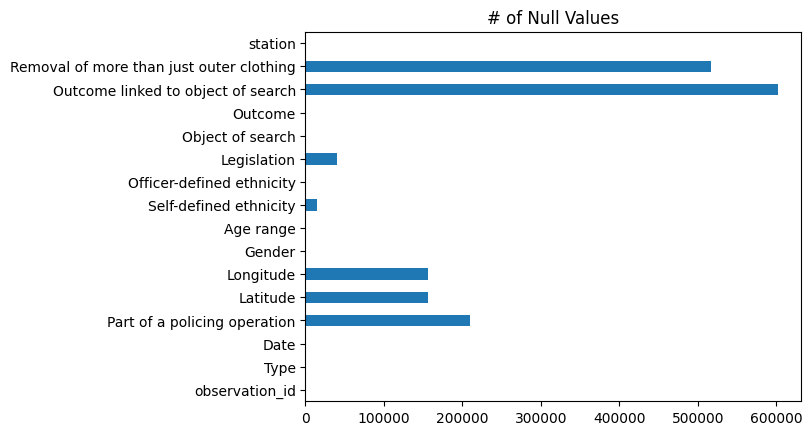

In [4]:
df_.isna().sum().plot.barh()
plt.title("# of Null Values")

The list of unique values in 'Type' is :['Person search', 'Person and Vehicle search', 'Vehicle search']


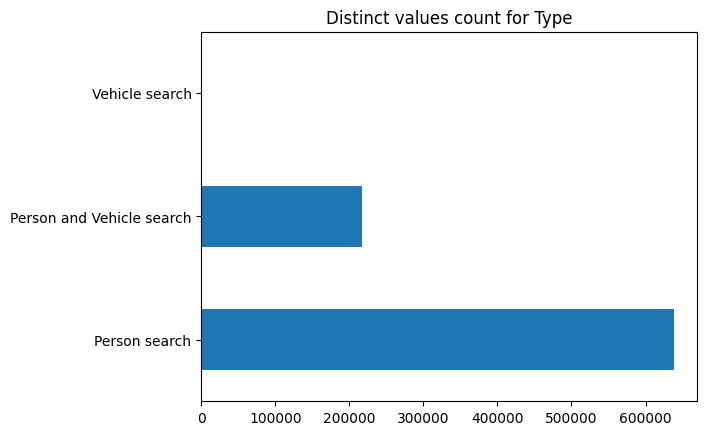

In [13]:
show_unique_value_graph(df_, "Type")

The list of unique values in 'Part of a policing operation' is :[nan, False, True]


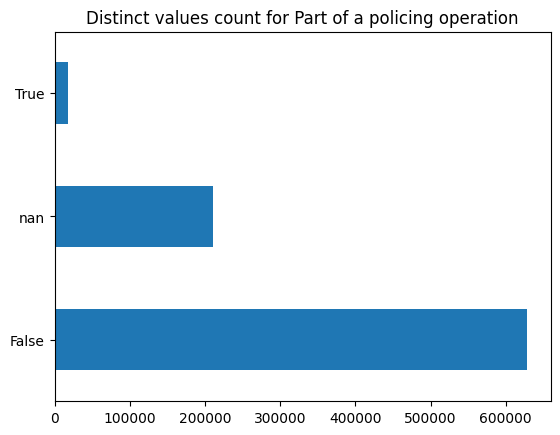

In [14]:
show_unique_value_graph(df_, "Part of a policing operation")

The list of unique values in 'Gender' is :['Male', 'Female', 'Other']


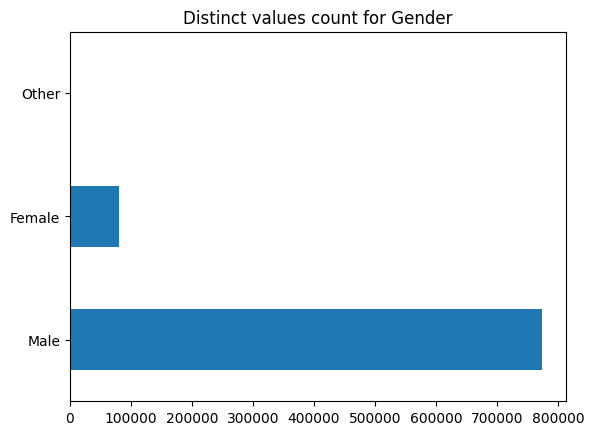

In [15]:
show_unique_value_graph(df_, "Gender")

The list of unique values in 'Age range' is :['25-34', 'over 34', '10-17', '18-24', 'under 10']


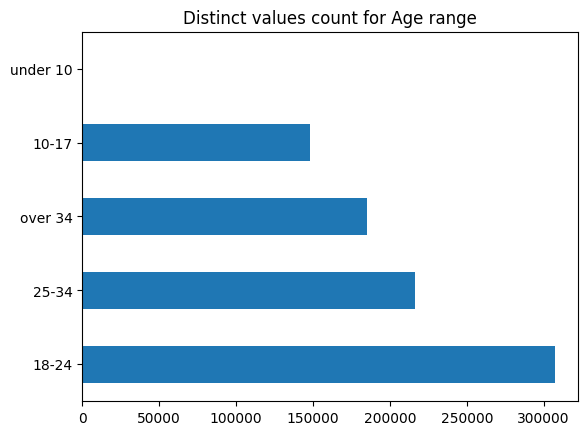

In [16]:
show_unique_value_graph(df_, "Age range")

In [18]:
show_unique_value_graph(df_, "Self-defined ethnicity")

The list of unique values in 'Self-defined ethnicity' is :['Other ethnic group - Not stated', 'White - Any other White background', 'White - English/Welsh/Scottish/Northern Irish/British', 'Mixed/Multiple ethnic groups - White and Black African', 'Black/African/Caribbean/Black British - Any other Black/African/Caribbean background', 'Black/African/Caribbean/Black British - Caribbean', 'Asian/Asian British - Any other Asian background', 'Asian/Asian British - Indian', 'Asian/Asian British - Bangladeshi', 'Black/African/Caribbean/Black British - African', 'White - Irish', 'Other ethnic group - Any other ethnic group', 'Mixed/Multiple ethnic groups - White and Asian', 'Asian/Asian British - Chinese', 'Mixed/Multiple ethnic groups - Any other Mixed/Multiple ethnic background', 'Mixed/Multiple ethnic groups - White and Black Caribbean', 'Asian/Asian British - Pakistani', 'White - Gypsy or Irish Traveller', nan, 'Other ethnic group - Arab']


White - English/Welsh/Scottish/Northern Irish/British                                   353095
Other ethnic group - Not stated                                                         136650
White - Any other White background                                                       74405
Black/African/Caribbean/Black British - Any other Black/African/Caribbean background     62216
Black/African/Caribbean/Black British - African                                          43750
Asian/Asian British - Any other Asian background                                         40676
Black/African/Caribbean/Black British - Caribbean                                        28864
Asian/Asian British - Pakistani                                                          23903
Asian/Asian British - Bangladeshi                                                        16808
Other ethnic group - Any other ethnic group                                              15203
NaN                                               

The list of unique values in 'Officer-defined ethnicity' is :['White', 'Other', 'Asian', 'Black', 'Mixed']


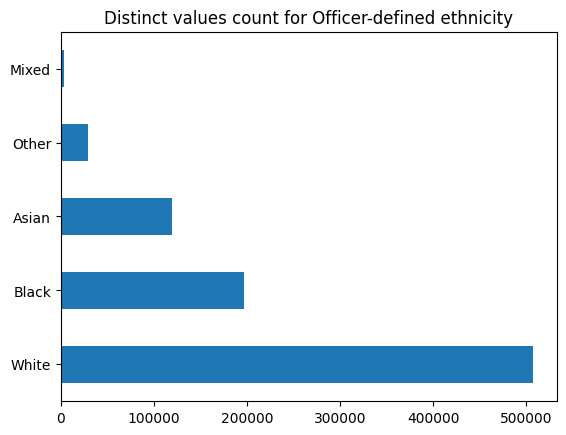

In [19]:
show_unique_value_graph(df_, "Officer-defined ethnicity")

In [20]:
show_unique_value_graph(df_, "Legislation")

The list of unique values in 'Legislation' is :['Police and Criminal Evidence Act 1984 (section 1)', 'Misuse of Drugs Act 1971 (section 23)', 'Firearms Act 1968 (section 47)', 'Poaching Prevention Act 1862 (section 2)', 'Psychoactive Substances Act 2016 (s36(2))', 'Criminal Justice and Public Order Act 1994 (section 60)', 'Criminal Justice Act 1988 (section 139B)', nan, 'Psychoactive Substances Act 2016 (s37(2))', 'Wildlife and Countryside Act 1981 (section 19)', 'Aviation Security Act 1982 (section 27(1))', 'Public Stores Act 1875 (section 6)', 'Hunting Act 2004 (section 8)', 'Environmental Protection Act 1990 (section 34B )', 'Customs and Excise Management Act 1979 (section 163)', 'Police and Criminal Evidence Act 1984 (section 6)', 'Conservation of Seals Act 1970 (section 4)', 'Crossbows Act 1987 (section 4)', 'Deer Act 1991 (section 12)', 'Protection of Badgers Act 1992 (section 11)']


Misuse of Drugs Act 1971 (section 23)                      546936
Police and Criminal Evidence Act 1984 (section 1)          254859
NaN                                                         39747
Criminal Justice and Public Order Act 1994 (section 60)      8711
Firearms Act 1968 (section 47)                               4610
Criminal Justice Act 1988 (section 139B)                      549
Psychoactive Substances Act 2016 (s36(2))                     547
Poaching Prevention Act 1862 (section 2)                      408
Police and Criminal Evidence Act 1984 (section 6)              92
Wildlife and Countryside Act 1981 (section 19)                 39
Environmental Protection Act 1990 (section 34B )               25
Deer Act 1991 (section 12)                                     17
Aviation Security Act 1982 (section 27(1))                     17
Customs and Excise Management Act 1979 (section 163)           16
Hunting Act 2004 (section 8)                                   12
Crossbows 

In [21]:
show_unique_value_graph(df_, "Object of search")

The list of unique values in 'Object of search' is :['Article for use in theft', 'Controlled drugs', 'Stolen goods', 'Offensive weapons', 'Anything to threaten or harm anyone', 'Articles for use in criminal damage', 'Firearms', 'Game or poaching equipment', 'Psychoactive substances', 'Fireworks', 'Evidence of offences under the Act', 'Goods on which duty has not been paid etc.', 'Detailed object of search unavailable', 'Crossbows', 'Evidence of wildlife offences', 'Evidence of hunting any wild mammal with a dog', 'Seals or hunting equipment']


Controlled drugs                                  558100
Offensive weapons                                 112652
Stolen goods                                       75698
Article for use in theft                           38706
Evidence of offences under the Act                 23080
Articles for use in criminal damage                16696
Anything to threaten or harm anyone                15535
Firearms                                            5420
Fireworks                                           5072
Psychoactive substances                             4805
Game or poaching equipment                           321
Detailed object of search unavailable                309
Goods on which duty has not been paid etc.            97
Crossbows                                             54
Evidence of wildlife offences                         46
Evidence of hunting any wild mammal with a dog        12
Seals or hunting equipment                             7
Name: Object of search, dtype: 

The list of unique values in 'Outcome' is :['Community resolution', 'A no further action disposal', 'Arrest', 'Summons / charged by post', 'Caution (simple or conditional)', 'Penalty Notice for Disorder', 'Khat or Cannabis warning']


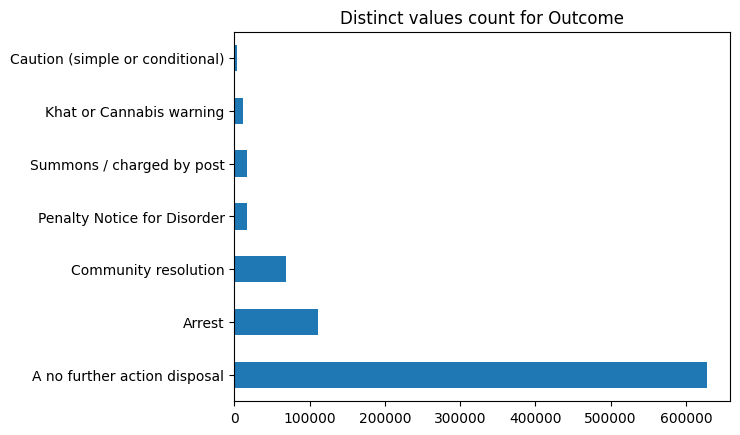

In [22]:
show_unique_value_graph(df_, "Outcome")

## Notes on Outcomes
- **Community resolution**: Community resolutions are frequently used by police to deal with low-level offending. If you accept a community resolution, you are not prosecuted and therefore not required to attend court. ([from this page](https://www.bindmans.com/knowledge-hub/blogs/what-are-community-resolutions/))
- **A no further action disposal**
- **Arrest**
- **Summons / charged by post**
- **Caution (simple or conditional)**: A police caution is a formal alternative to prosecution in minor cases, administered by the police in England and Wales. It is commonly used to resolve cases where full prosecution is not seen as the most appropriate solution.[1] Accepting a caution requires an admission of guilt. ([from wikipedia](https://en.wikipedia.org/wiki/Police_caution))
- **Penalty Notice for Disorder**
- **Khat or Cannabis warning**

The list of unique values in 'Outcome linked to object of search' is :[False, True, nan]


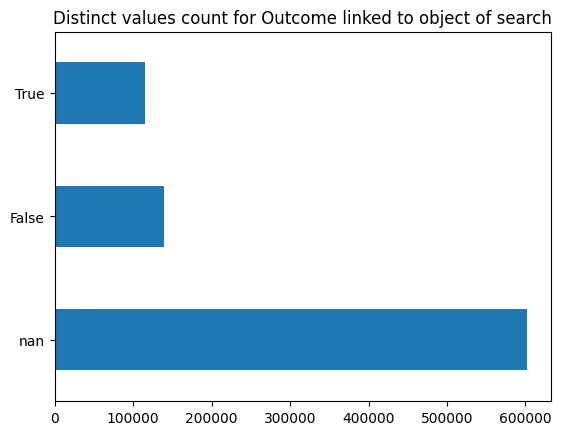

In [23]:
show_unique_value_graph(df_, "Outcome linked to object of search")

The list of unique values in 'Removal of more than just outer clothing' is :[False, True, nan]


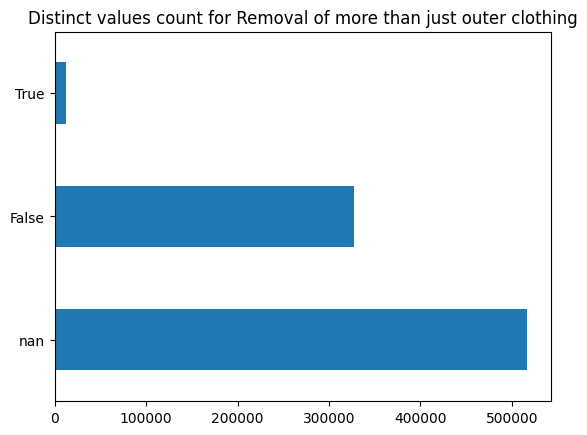

In [24]:
show_unique_value_graph(df_, "Removal of more than just outer clothing")

In [25]:
show_unique_value_graph(df_, "station")

The list of unique values in 'station' is :['hampshire', 'sussex', 'south-yorkshire', 'staffordshire', 'bedfordshire', 'cumbria', 'nottinghamshire', 'warwickshire', 'devon-and-cornwall', 'leicestershire', 'durham', 'humberside', 'thames-valley', 'norfolk', 'lincolnshire', 'northamptonshire', 'kent', 'wiltshire', 'city-of-london', 'west-mercia', 'lancashire', 'cheshire', 'derbyshire', 'btp', 'surrey', 'hertfordshire', 'north-yorkshire', 'cambridgeshire', 'metropolitan', 'northumbria', 'west-yorkshire', 'north-wales', 'cleveland', 'gloucestershire', 'avon-and-somerset', 'dorset', 'suffolk', 'dyfed-powys', 'west-midlands', 'merseyside', 'essex']


metropolitan          436867
merseyside             38563
thames-valley          31437
west-yorkshire         25321
south-yorkshire        24300
hampshire              20230
btp                    18557
kent                   17875
lancashire             15254
hertfordshire          13971
avon-and-somerset      13189
essex                  12889
sussex                 11378
devon-and-cornwall     10906
surrey                 10774
humberside             10306
west-midlands           9271
west-mercia             9262
staffordshire           9039
norfolk                 8766
leicestershire          8298
cheshire                8271
northumbria             8034
cleveland               7907
nottinghamshire         7523
north-wales             7044
suffolk                 6482
bedfordshire            5904
lincolnshire            5030
dyfed-powys             4851
city-of-london          4539
northamptonshire        4427
warwickshire            3923
durham                  3585
north-yorkshir